In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
info_data_path = "../data/raw_data/data.info"
with open(info_data_path, 'r') as f:
    info = f.read().splitlines()

info_list = [info[i].split(",") for i in range(len(info))]
info_df = pd.DataFrame(info_list[1:]) 
info_df.columns = info_list[0]

In [ ]:
info_df["transcript_position"] = info_df["transcript_position"].astype(str).astype(int)

In [3]:
mcf7_rep3_run1 = pd.read_csv("../data/aws_predictions/mcf7_rep3_run1_prediction.csv")
mcf7_rep4_run1 = pd.read_csv("../data/aws_predictions/mcf7_rep4_run1_prediction.csv")

In [4]:
mcf7_rep3_run1.equals(mcf7_rep4_run1)

True

In [5]:
mcf7_rep3_run1["label"] = mcf7_rep3_run1.score.map(lambda x:1 if x>=0.35 else 0)


In [10]:
mcf7_rep3_run1.head()

,transcript,position,score,label
0,ENST00000373020,1006,0.009091,0
1,ENST00000373020,1013,0.009091,0
2,ENST00000373020,1149,0.000000,0
3,ENST00000373020,512,0.018182,0
4,ENST00000373020,689,0.009091,0


In [15]:
info_df.transcript_position = info_df.transcript_position.astype(int)

In [17]:
merged_d0 = mcf7_rep3_run1.merge(info_df, how = "left", left_on = ["transcript", "position"], right_on = ["transcript_id", "transcript_position"])
merged_d0 = merged_d0.drop(["transcript_id", "transcript_position"], axis = 1)

In [18]:
merged_d0.head()

,transcript,position,score,label_x,gene_id,label_y
0,ENST00000373020,1006,0.009091,0,ENSG00000000003,0
1,ENST00000373020,1013,0.009091,0,ENSG00000000003,0
2,ENST00000373020,1149,0.000000,0,ENSG00000000003,0
3,ENST00000373020,512,0.018182,0,ENSG00000000003,0
4,ENST00000373020,689,0.009091,0,ENSG00000000003,0


In [19]:
merged_d0['x_actual'] = np.where((merged_d0['label_x'] == merged_d0['label_y']), True, False)


In [23]:
mcf7_count = list(merged_d0["x_actual"].value_counts())

In [27]:
mcf7_count

[119481]

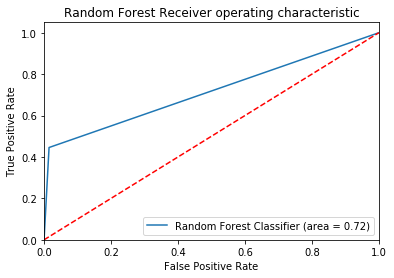

In [22]:
## define roc metrics
y_pred = merged_d0.label_x
y_test = merged_d0.label_y.astype(int)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

## plot roc curve
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()